# HW04: ML and DL

Remember that these homework work as a completion grade. **You can skip one section without losing credit.**

## Load and Pre-process Text
We do sentiment analysis on the [Movie Review Data](https://www.cs.cornell.edu/people/pabo/movie-review-data/). If you would like to know more about the data, have a look at [the paper](https://www.cs.cornell.edu/home/llee/papers/pang-lee-stars.pdf) (but no need to do so).

In [2]:
# In this tutorial, we do sentiment analysis
# download the data
#!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
#!tar xf aclImdb_v1.tar.gz

# Download only worked with --no-check-certificate -> check website manually first!
!wget https://www.cs.cornell.edu/people/pabo/movie-review-data/scale_data.tar.gz # --no-check-certificate
!wget https://www.cs.cornell.edu/people/pabo/movie-review-data/scale_whole_review.tar.gz # --no-check-certificate
 
!tar xf scale_data.tar.gz 
!tar xf scale_whole_review.tar.gz

--2023-03-23 14:03:30--  https://www.cs.cornell.edu/people/pabo/movie-review-data/scale_data.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4029756 (3.8M) [application/x-gzip]
Saving to: ‘scale_data.tar.gz’

scale_data.tar.gz   100%[===================>]   3.84M  5.67MB/s    in 0.7s    

2023-03-23 14:03:31 (5.67 MB/s) - ‘scale_data.tar.gz’ saved [4029756/4029756]

--2023-03-23 14:03:31--  https://www.cs.cornell.edu/people/pabo/movie-review-data/scale_whole_review.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8853204 (8.4M) [application/x-gzip]
Saving to: ‘scale_whole_review.tar.gz’

scale_whole_review. 100%[===================>]   8.44M  10.9MB/s  

First, we have to load the data for which we provide the function below. Note how we also preprocess the text using gensim's simple_preprocess() function and how we already split the data into a train and test split.

In [3]:
import os
from gensim.utils import simple_preprocess
def load_data():
    examples, labels = [], []
    authors = os.listdir("scale_whole_review")
    for author in authors:
        path = os.listdir(os.path.join("scale_whole_review", author, "txt.parag"))
        fn_ids = os.path.join("scaledata", author, "id." + author)
        fn_ratings = os.path.join("scaledata", author, "rating." + author)
        with open(fn_ids) as ids, open(fn_ratings) as ratings:
            for idx, rating in zip(ids, ratings):
                labels.append(float(rating.strip()))
                filename_text = os.path.join("scale_whole_review", author, "txt.parag", idx.strip() + ".txt")
                with open(filename_text, encoding='latin-1') as f:
                    examples.append(" ".join(simple_preprocess(f.read())))
    return examples, labels
                  
X,y  = load_data()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("text:", X_train[0], "\nlabel:", y_train[0])

text: stanley ipkiss whose letter to the local paper signed nice guys finish last had generated torrent of replies the year before has been undergoing change lately bank clerk ipkiss played with sweet sincerity by jim carrey discovers mask that like dr jekyll potion temporarily creates an all new person to understand how the mask works he turns to masks that people wear expert named dr neuman played with dripping sincerity and dead pan humor by ben stein although the doctor proves useless stanley finally discovers for himself what the mask does it magnifies your inner desires since ipkiss is an incurable romantic who spends his free time watching cartoons it is inevitable that the mask turns him into the world greatest lover and song and dance man after avoiding carrey for years was blown away by his performance in liar liar one of this year funniest films since the mask in was the movie that really launched his film career suggested we check it out one evening on vacation with the hel

## Vectorize the data

In [4]:
# train a TF_IDF Vectorizer on X_train and vectorize X_train and X_test
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.5,  
                        stop_words='english',
                        ngram_range=(1,2))

##TODO train vectorizer
fitted_vectorizer = vec.fit(X_train)

##TODO transform X_train to TF-IDF values
X_train_tfidf = fitted_vectorizer.transform(X_train)

##TODO transform X_test to TF-IDF values
X_test_tfidf = fitted_vectorizer.transform(X_test)

In [5]:
import pandas as pd

# get the first vector out (for the first document)
first_vector_tfidfvectorizer = X_test_tfidf[0]

df2 = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index = fitted_vectorizer.get_feature_names_out(), columns = ["tfidf"])
df2.sort_values(by = ["tfidf"], ascending = False)

,tfidf
daughter,0.368164
pierce,0.350042
joan,0.223164
rotten,0.164732
rt,0.126629
...,...
flavor,0.000000
flat,0.000000
flashy,0.000000
flashes,0.000000


In [6]:
##TODO scale both training and test data with the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)

X_train_scale = scaler.fit_transform(X_train_tfidf)
X_test_scale = scaler.transform(X_test_tfidf) # use the same scaling and shifting operation as with the train data 

## ElasticNet

In [7]:
##TODO train an elastic net on the transformed output of the scaler
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.01)

##TODO train the ElasticNet
en.fit(X_train_scale, y_train)

##TODO predict the testset
y_test_pred = en.predict(X_test_scale)

##TODO print mean squared error and r2 score on the test set
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, balanced_accuracy_score

test_mse = mean_squared_error(y_test, y_test_pred)
print(test_mse)

test_r2 = r2_score(y_test, y_test_pred)
print(test_r2)

0.016478059799741315
0.48565901987142357


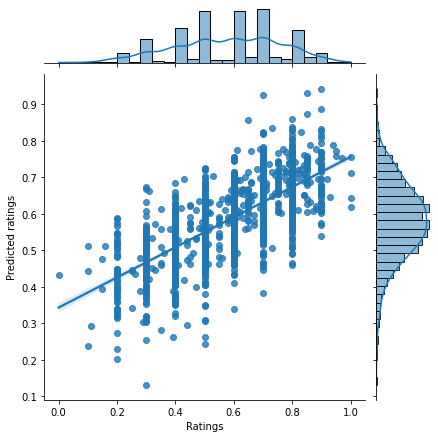

In [8]:
import seaborn as sns

p = sns.jointplot(x= y_test, y= y_test_pred, kind='reg')
p.set_axis_labels('Ratings', 'Predicted ratings', fontsize=10)

## Logistic Regression

Next, we train an OLS model doing binary prediction on these movie reviews. Two get two bins, we transform the continuous ratings into two classes, where one class contains all the negative ratings (value < 0.5), the other class all the positive ratings (value > 0.5)

In [9]:
y_train = [1 if i >= 0.5 else 0 for i in y_train]
y_test = [1 if i >= 0.5 else 0 for i in y_test]

In [10]:
##TODO train logistic regression on X_train
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(max_iter=500)

##TODO train a logistic regression
logistic_regression.fit(X_train_scale, y_train)

##TODO predict the testset 
y_test_pred = logistic_regression.predict(X_test_scale)

##since we have continuous output, we need to post-process our labels into two classes. We choose a threshold of 0.5 
def map_predictions(predicted):
    predicted = [1 if i > 0.5 else 0 for i in predicted]
    return predicted
y_test_pred_binary = map_predictions(y_test_pred)

##TODO print the accuracy of our classifier on the testset
accuracy_mse = accuracy_score(y_test, y_test_pred_binary)
print("Accuracy:", accuracy_mse)

Accuracy: 0.8153753026634383


In [11]:
## TODO print the 10 most informative words of the regression (the 10 words having the highest coefficients)
coefficients = logistic_regression.coef_[0]

# get the feature names from the TfidfVectorizer object
feature_names = vec.get_feature_names_out()

# create a list of (feature, coefficient) pairs and sort the list
features_coefficients = list(zip(feature_names, coefficients))
features_coefficients = sorted(features_coefficients, key=lambda x: abs(x[1]), reverse=True)

# top 10 most informative words
print("Top 10 most informative words:")
for feature, coefficient in features_coefficients[:10]:
    print(feature, ": ", coefficient)

Top 10 most informative words:
bad :  -0.25926751954880123
uninteresting :  -0.23980993814358967
boring :  -0.23240890354371038
lifeless :  -0.2247158191159076
unfunny :  -0.22318139284155042
dumb :  -0.22062402575113682
ridiculous :  -0.21428779435990608
lame :  -0.2142073821932898
success :  0.20775176439957313
worst :  -0.20722817798782792


# Deep Learning

## MLP

In [12]:
#Import the AG news dataset (same as hw01)
#Download them from here 
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df = df.sample(n=10000) # # only use 10K datapoints

--2023-03-23 14:04:00--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M  --.-KB/s    in 0.1s    

2023-03-23 14:04:02 (206 MB/s) - ‘train.csv’ saved [29470338/29470338]



In [13]:
# create a new variable "business" that takes value 1 if the label is business and 0 otherwise
df['business'] = df['label'].apply(lambda x: int(x=='business'))
y = df['business'].values
df['business'].head()

41683     0
93129     1
83519     0
109737    0
63190     1
Name: business, dtype: int64

In [14]:
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer

# pre-process text as you did in HW02
def tokenize(x):
    return [w.lemma_.lower() for w in nlp(x) if not w.is_stop and not w.is_punct and not w.is_digit]
df["tokens"] = df["text"].apply(lambda x: tokenize(x))
df["preprocessed"] = df['tokens'].apply(lambda x: ' '.join(x))
df.head()

,label,title,lead,text,business,tokens,preprocessed
41683,world,Ford Launches Its All-New 2005 Mustang,DETROIT - Ford Motor Co. launched its all-new ...,Ford Launches Its All-New 2005 Mustang DETROIT...,0,"[ford, launches, new, mustang, detroit, ford, ...",ford launches new mustang detroit ford motor c...
93129,business,SBC in Deal With Microsoft to Provide TV on Hi...,SBC Communications will pay \$400 million to M...,SBC in Deal With Microsoft to Provide TV on Hi...,1,"[sbc, deal, microsoft, provide, tv, high, spee...",sbc deal microsoft provide tv high speed lines...
83519,sport,Terps Come Out 'Flat',The Terps have lost games this season because ...,Terps Come Out 'Flat' The Terps have lost game...,0,"[terp, come, flat, terps, lose, game, season, ...",terp come flat terps lose game season offensiv...
109737,world,Panel Examines Funds for Energy Security (AP),AP - Future energy security will require devel...,Panel Examines Funds for Energy Security (AP) ...,0,"[panel, examines, funds, energy, security, ap,...",panel examines funds energy security ap ap fut...
63190,business,Oil Prices Hit Peaks on Winter Worries (Reuters),Reuters - Oil prices rallied to a record above...,Oil Prices Hit Peaks on Winter Worries (Reuter...,1,"[oil, price, hit, peaks, winter, worries, reut...",oil price hit peaks winter worries reuters reu...


In [15]:
##TODO vectorize the pre-processed text using CountVectorizer

vectorizer = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_features=1000,
                        stop_words='english',
                        max_df=.9,  
                        ngram_range=(1,3))
X = vectorizer.fit_transform(df['preprocessed'])
vocab = vectorizer.get_feature_names_out()
vocab[:100]

array(['000', '39', 'accord', 'add', 'afp', 'afp afp', 'agency', 'ago',
       'agree', 'agreement', 'ahead', 'aim', 'air', 'al', 'allow',
       'america', 'american', 'amp', 'announce', 'ap', 'ap ap', 'apple',
       'ask', 'aspx', 'aspx ticker', 'athens', 'attack', 'australia',
       'australian', 'away', 'baghdad', 'bank', 'base', 'battle', 'beat',
       'begin', 'bid', 'big', 'billion', 'bomb', 'boost', 'boston',
       'break', 'bring', 'british', 'build', 'bush', 'business', 'buy',
       'campaign', 'capital', 'car', 'case', 'center', 'champion',
       'championship', 'change', 'charge', 'chicago', 'chief', 'china',
       'chip', 'city', 'claim', 'close', 'coach', 'com', 'com fullquote',
       'com fullquote aspx', 'come', 'commission', 'company', 'computer',
       'concern', 'consumer', 'continue', 'contract', 'control', 'corp',
       'cost', 'country', 'court', 'cup', 'customer', 'cut', 'datum',
       'day', 'deal', 'decision', 'demand', 'despite', 'develop',
       '

Your goal here is to use features from the Vectorized text to predict whether the snippet is from a business article.

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchsummary import summary

import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
print(len(vocab)) # -> this number is the input_size in summary below
print(X.shape) 

422
(10000, 422)


In [21]:
## TODO build a MLP model with at least 2 hidden layers with ReLU activation, followed by dropout and an output layer with sigmoid activation

device = 'cuda' # to use GPU in colab, refer to https://medium.com/dataman-in-ai/start-using-google-colab-free-gpu-7968acb7ef92#:~:text=Go%20to%20Edit%20%3E%20Notebook%20settings,That's%20it. 

# create a torch dataset to contain our data
class ScCasesDataset(Dataset):

  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self, index):
    return self.X[index], self.y[index]


tsize = math.ceil(0.1 * len(y))
X_train, X_valid, y_train, y_valid = train_test_split(X.toarray(), np.array(y), test_size=tsize)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=tsize)

train_dataset = ScCasesDataset(X_train, y_train)
valid_dataset = ScCasesDataset(X_valid, y_valid)
test_dataset = ScCasesDataset(X_test, y_test)

# prepare dataloaders where we can load mini-batches from
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# create an MLP model
input_dim = X.shape[1]
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # use nn.Sequential to sequentially stack modules
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 50), # input layer
            nn.ReLU(), # activation function
            nn.Linear(50, 50), # hidden layer
            nn.ReLU(),
            nn.Linear(50, 50), # hidden layer
            nn.ReLU(),
            nn.Dropout(0.25), # Define proportion or neurons to dropout
            nn.Linear(50, 1), # output layer
            nn.Sigmoid() # Sigmoid activation
        )
        
    # define the forward propagation which is necessary for torch models
    def forward(self, x):
        return self.layers(x)

# initialize a model on GPU
model = MLP().to(device)

## TODO summarize the model using torchsummary
summary(model, input_size=(input_dim,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 50]          21,150
              ReLU-2                   [-1, 50]               0
            Linear-3                   [-1, 50]           2,550
              ReLU-4                   [-1, 50]               0
            Linear-5                   [-1, 50]           2,550
              ReLU-6                   [-1, 50]               0
           Dropout-7                   [-1, 50]               0
            Linear-8                    [-1, 1]              51
           Sigmoid-9                    [-1, 1]               0
Total params: 26,301
Trainable params: 26,301
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.10
Estimated Total Size (MB): 0.10
---------------------------------------------

In [26]:
class EarlyStopping:
    def __init__(self, tolerance=5, min_delta=0):

        self.tolerance = tolerance
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False

    def __call__(self, train_loss, validation_loss):
        if (validation_loss - train_loss) > self.min_delta:
            self.counter +=1
            if self.counter >= self.tolerance:  
                self.early_stop = True

In [28]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

# fit the model
model = MLP().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.BCEWithLogitsLoss() # a binary cross entropy loss combined with a sigmoid activation

mean_train_losses = []
mean_valid_losses = []
valid_acc_list = []
epochs = 100
best_score = 0

patience = 5
n_epochs_no_improve = 0

for epoch in range(epochs):
    # switch the model to train mode
    model.train()
    
    train_losses = []
    valid_losses = []
    for i, (Xs, labels) in enumerate(train_loader):
        
        optimizer.zero_grad()
        
        outputs = model(Xs.float().to(device))
        loss = loss_fn(outputs, labels.float().unsqueeze(1).to(device)) # shape (32,) -> (32,1)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
            
    model.eval()
    pred_labels = []
    true_labels = []
    with torch.no_grad():
        for i, (Xs, labels) in enumerate(valid_loader):
            outputs = model(Xs.float().to(device))
            loss = loss_fn(outputs, labels.float().unsqueeze(1).to(device))
            
            valid_losses.append(loss.item())
            
            predicted = [1 if d > 0.5 else 0 for d in outputs.data.squeeze()]
            pred_labels.extend(predicted)
            true_labels.extend(list(labels))
            
        accuracy = accuracy_score(true_labels, pred_labels)
        valid_acc_list.append(accuracy)
        
        if accuracy > best_score:
            torch.save(model, 'best.pt')
            best_score = accuracy
            n_epochs_no_improve = 0
        else:
            n_epochs_no_improve += 1

        if n_epochs_no_improve >= patience:
            print('Early stopping at epoch %d' % (epoch+1))
            break
            
    mean_train_losses.append(np.mean(train_losses))
    mean_valid_losses.append(np.mean(valid_losses))
    
    print('epoch : {}, train loss : {:.4f}, valid loss : {:.4f}, valid acc : {:.2f}%'\
         .format(epoch+1, np.mean(train_losses), np.mean(valid_losses), accuracy))

    if n_epochs_no_improve >= patience:
        break

model = torch.load('best.pt')
model.eval()

pred_labels = []
true_labels = []
for i, (Xs, labels) in enumerate(test_loader):
    outputs = model(Xs.float().to(device))
    
    pred = [1 if d > 0.5 else 0 for d in outputs.data.squeeze()]
    pred_labels.extend(pred)
    true_labels.extend(list(labels))

print('test accuracy:', accuracy_score(true_labels, pred_labels))

epoch : 1, train loss : 0.7045, valid loss : 0.6509, valid acc : 0.86%
epoch : 2, train loss : 0.6491, valid loss : 0.6475, valid acc : 0.87%
epoch : 3, train loss : 0.6425, valid loss : 0.6481, valid acc : 0.87%
epoch : 4, train loss : 0.6392, valid loss : 0.6466, valid acc : 0.87%
epoch : 5, train loss : 0.6367, valid loss : 0.6446, valid acc : 0.88%
epoch : 6, train loss : 0.6356, valid loss : 0.6435, valid acc : 0.88%
epoch : 7, train loss : 0.6337, valid loss : 0.6435, valid acc : 0.88%
epoch : 8, train loss : 0.6318, valid loss : 0.6456, valid acc : 0.88%
epoch : 9, train loss : 0.6306, valid loss : 0.6462, valid acc : 0.88%
epoch : 10, train loss : 0.6300, valid loss : 0.6473, valid acc : 0.87%
epoch : 11, train loss : 0.6299, valid loss : 0.6491, valid acc : 0.87%
Early stopping at epoch 12
test accuracy: 0.892
